In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('Salary Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150

In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [6]:
df.drop(columns = ['Job Title'], inplace = True)

In [7]:
gender_label = LabelEncoder()
df['Gender']=gender_label.fit_transform(df['Gender'])
edu_label_encoder = LabelEncoder()
df['Education Level'] = edu_label_encoder.fit_transform(df['Education Level'])
df

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,0,5.0,90000.0
1,28.0,0,1,3.0,65000.0
2,45.0,1,2,15.0,150000.0
3,36.0,0,0,7.0,60000.0
4,52.0,1,1,20.0,200000.0
...,...,...,...,...,...
370,35.0,0,0,8.0,85000.0
371,43.0,1,1,19.0,170000.0
372,29.0,0,0,2.0,40000.0
373,34.0,1,0,7.0,90000.0


In [8]:
df['Education Level'].value_counts()

0    224
1     98
2     51
Name: Education Level, dtype: int64

# Decision Tree

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Salary Data.csv')
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [12]:
df.drop(columns = ['Job Title'], inplace = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [14]:
df.dropna(inplace=True)
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), object(2)
memory usage: 17.5+ KB


In [15]:
df['Gender'].unique()
gender_label = LabelEncoder()
df['Gender']=gender_label.fit_transform(df['Gender'])
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,Bachelor's,5.0,90000.0
1,28.0,0,Master's,3.0,65000.0
2,45.0,1,PhD,15.0,150000.0
3,36.0,0,Bachelor's,7.0,60000.0
4,52.0,1,Master's,20.0,200000.0


<AxesSubplot:ylabel='Gender'>

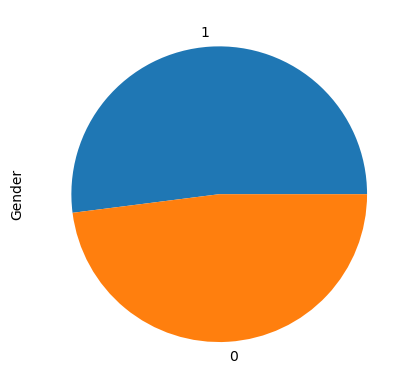

In [16]:
df['Gender'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Education Level'>

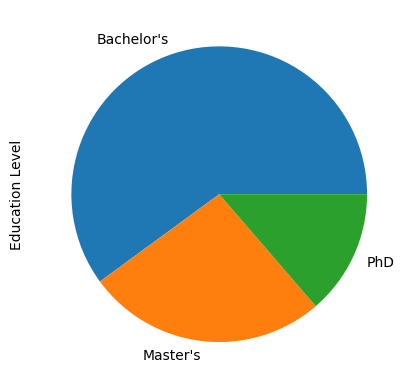

In [17]:
df['Education Level'].value_counts().plot(kind='pie')

In [18]:
edu_label_encoder = LabelEncoder()
df['Education Level'] = edu_label_encoder.fit_transform(df['Education Level'])

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
Y = df['Salary']
X = df.drop(['Salary'], axis=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [21]:
model=DecisionTreeRegressor(max_depth=4)
model.fit(x_train, y_train)
print(model.score(x_test, y_test)*100)

89.84016741271866


In [22]:
from sklearn import metrics
y_pred = model.predict(x_test)
print('r2 : ', metrics.r2_score(y_pred, y_test)*100)

r2 :  88.39300469277013


# Random Forest

In [23]:
import seaborn as sns

In [24]:
{columns:list(df[columns].unique()) for columns in df.columns}

{'Age': [32.0,
  28.0,
  45.0,
  36.0,
  52.0,
  29.0,
  42.0,
  31.0,
  26.0,
  38.0,
  48.0,
  35.0,
  40.0,
  27.0,
  44.0,
  33.0,
  39.0,
  25.0,
  51.0,
  34.0,
  47.0,
  30.0,
  41.0,
  37.0,
  24.0,
  43.0,
  50.0,
  46.0,
  49.0,
  23.0,
  53.0],
 'Gender': [1, 0],
 'Education Level': [0, 1, 2],
 'Years of Experience': [5.0,
  3.0,
  15.0,
  7.0,
  20.0,
  2.0,
  12.0,
  4.0,
  1.0,
  10.0,
  18.0,
  6.0,
  14.0,
  16.0,
  0.0,
  22.0,
  19.0,
  9.0,
  13.0,
  11.0,
  25.0,
  21.0,
  8.0,
  17.0,
  23.0,
  24.0,
  0.5,
  1.5],
 'Salary': [90000.0,
  65000.0,
  150000.0,
  60000.0,
  200000.0,
  55000.0,
  120000.0,
  80000.0,
  45000.0,
  110000.0,
  75000.0,
  140000.0,
  130000.0,
  40000.0,
  125000.0,
  115000.0,
  35000.0,
  180000.0,
  190000.0,
  50000.0,
  250000.0,
  170000.0,
  160000.0,
  85000.0,
  95000.0,
  105000.0,
  70000.0,
  100000.0,
  30000.0,
  135000.0,
  220000.0,
  175000.0,
  185000.0,
  145000.0,
  155000.0,
  350.0]}

In [25]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    int32  
 2   Education Level      373 non-null    int32  
 3   Years of Experience  373 non-null    float64
 4   Salary               373 non-null    float64
dtypes: float64(3), int32(2)
memory usage: 14.6 KB


In [27]:
df['Gender'] = df['Gender'].replace({1:0, 0:1})

In [28]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [29]:
test_data = df.tail(10)

In [30]:
df = df.head(373)

<AxesSubplot:xlabel='Gender', ylabel='Salary'>

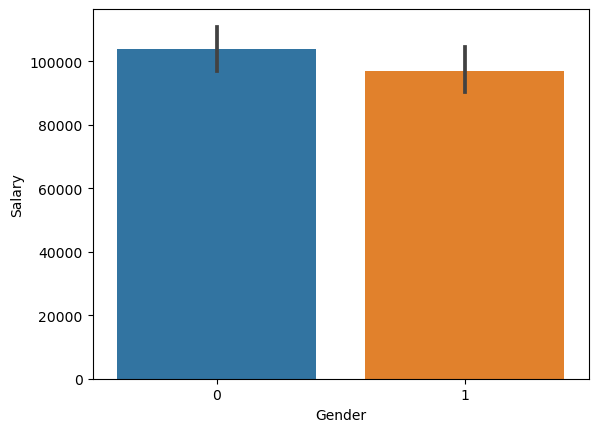

In [31]:
sns.barplot(x = 'Gender', y = 'Salary', data = df)

<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

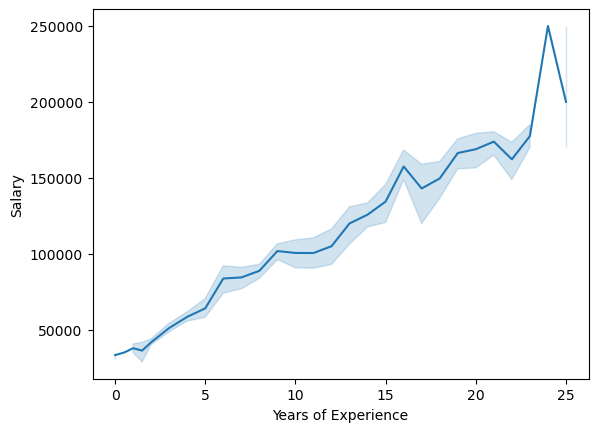

In [32]:
sns.lineplot(x = 'Years of Experience', y = 'Salary', data = df)

<AxesSubplot:>

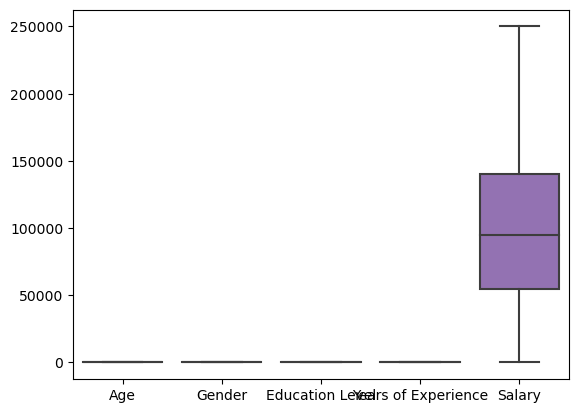

In [33]:
sns.boxplot(data = df)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [35]:
X = df.drop(columns = ['Salary'])
Y = df['Salary']

In [36]:
X.shape

(373, 4)

In [37]:
Y.shape

(373,)

In [38]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [39]:
X.shape

(373, 4)

In [40]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [41]:
rf = RandomForestRegressor()
xg = XGBRegressor()

In [42]:
rf.fit(X_train, Y_train)
xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [43]:
X.shape

(373, 4)

In [44]:
Y_pred_rf = rf.predict(X_test)
Y_pred_xg = xg.predict(X_test)

In [45]:
train_accuracy_rf = rf.score(X_train,Y_train)
test_accuracy_rf = rf.score(X_test,Y_test)

In [46]:
print('train_accuracy_rf:', train_accuracy_rf)
print('test_accuracy_rf:', test_accuracy_rf)

train_accuracy_rf: 0.9661141904947986
test_accuracy_rf: 0.9202219464711457


In [47]:
train_accuracy_xg = xg.score(X_train,Y_train)
test_accuracy_xg = xg.score(X_test,Y_test)

In [48]:
print('train_accuracy_xg:', train_accuracy_xg)
print('test_accuracy_xg:', test_accuracy_xg)

train_accuracy_xg: 0.9756132785421175
test_accuracy_xg: 0.9115400886242633


In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(Y_test,Y_pred_rf)
mse = mean_squared_error(Y_test,Y_pred_rf)
r2 = r2_score(Y_test,Y_pred_rf)

In [50]:
print('mae:',mae)
print('mse:',mse)
print('r2:',r2)

mae: 9056.606955155956
mse: 162135242.88601476
r2: 0.9202219464711457


In [51]:
test_data

,Age,Gender,Education Level,Years of Experience,Salary
365,43.0,0,1,18.0,170000.0
366,31.0,1,0,3.0,50000.0
367,41.0,0,0,14.0,150000.0
368,44.0,1,2,16.0,160000.0
369,33.0,0,0,4.0,60000.0
370,35.0,1,0,8.0,85000.0
371,43.0,0,1,19.0,170000.0
372,29.0,1,0,2.0,40000.0
373,34.0,0,0,7.0,90000.0
374,44.0,1,2,15.0,150000.0


In [52]:
test_data.drop(columns = ['Salary'], inplace=True)

In [53]:
test_data.columns

Index(['Age', 'Gender', 'Education Level', 'Years of Experience'], dtype='object')

In [54]:
predictions = rf.predict(test_data)

C:\Users\LOKI\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [55]:
predictions

array([195500., 182400., 195500., 191150., 195500., 182400., 195500.,
       187700., 195500., 191150.])

In [56]:
import pickle

In [58]:
pickle.dump(model,open('regmodel.pkl', 'wb'))